<a href="https://colab.research.google.com/github/arkothiwala/Analytics-Vidhya/blob/master/AV_GoD_FastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import torch
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 2.8MB/s 


In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1zRzgwnzMs52MN674v6TFDOMrKi1jg6dN' #File ID for the required Trainingdata
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('train-ship classification.zip')

In [0]:
import zipfile
zip_ref = zipfile.ZipFile('train-ship classification.zip', 'r')
zip_ref.extractall('data')
zip_ref.close()

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
import fastai

In [0]:
#batch size
bs = 64

In [0]:
path_img = 'data/images'
fnames = get_image_files(path_img)

In [7]:
fnames[:5]

[PosixPath('data/images/2909044.jpg'),
 PosixPath('data/images/1694762.jpg'),
 PosixPath('data/images/2016356.jpg'),
 PosixPath('data/images/2816922.jpg'),
 PosixPath('data/images/2845693.jpg')]

In [0]:
data = ImageDataBunch.from_csv(path_img, ds_tfms=get_transforms(), csv_labels='../train.csv', size=150, bs=bs).normalize(imagenet_stats)

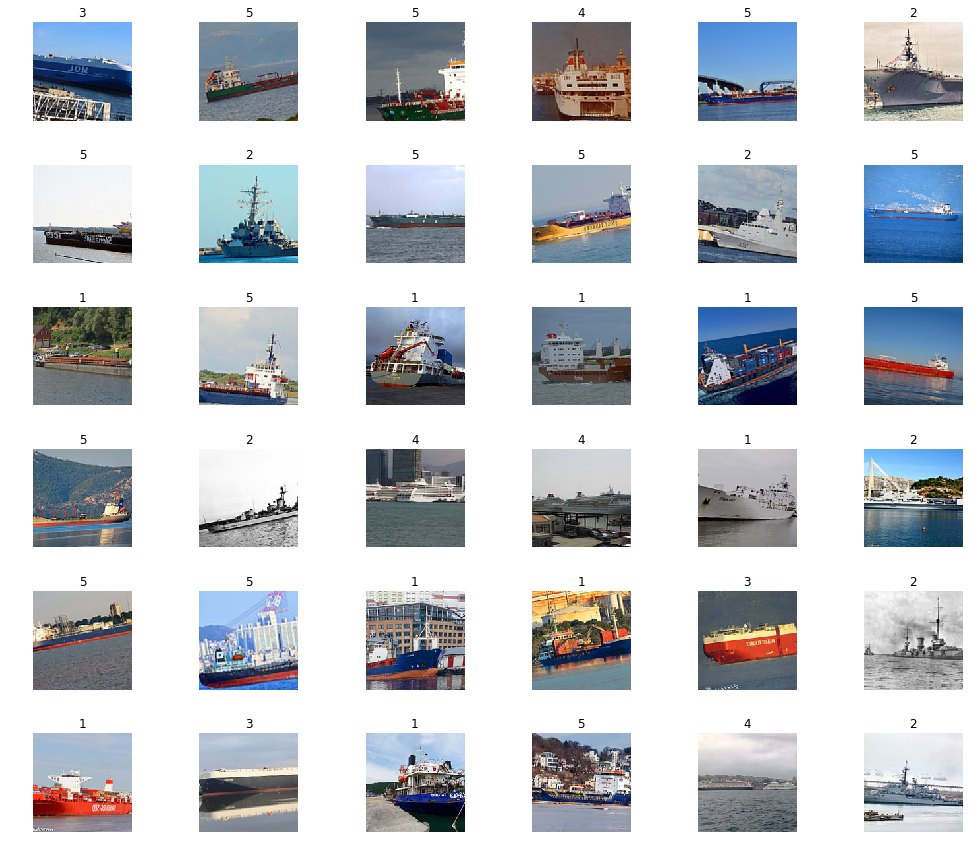

In [12]:
data.show_batch(rows=6, figsize=(14,12))

###Modelling

In [13]:
data.classes

[1, 2, 3, 4, 5]

In [14]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 93044358.16it/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.257466,0.237986,0.092190
2,0.263000,0.219487,0.080153
3,0.227852,0.189432,0.071345
4,0.203729,0.188289,0.068409


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

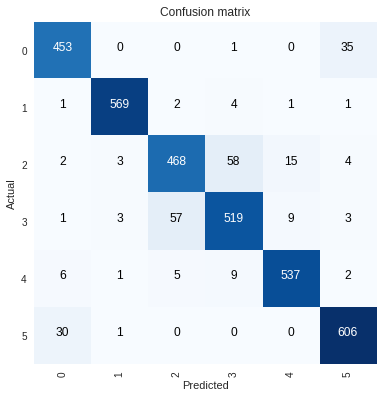

In [0]:
interp.plot_confusion_matrix()

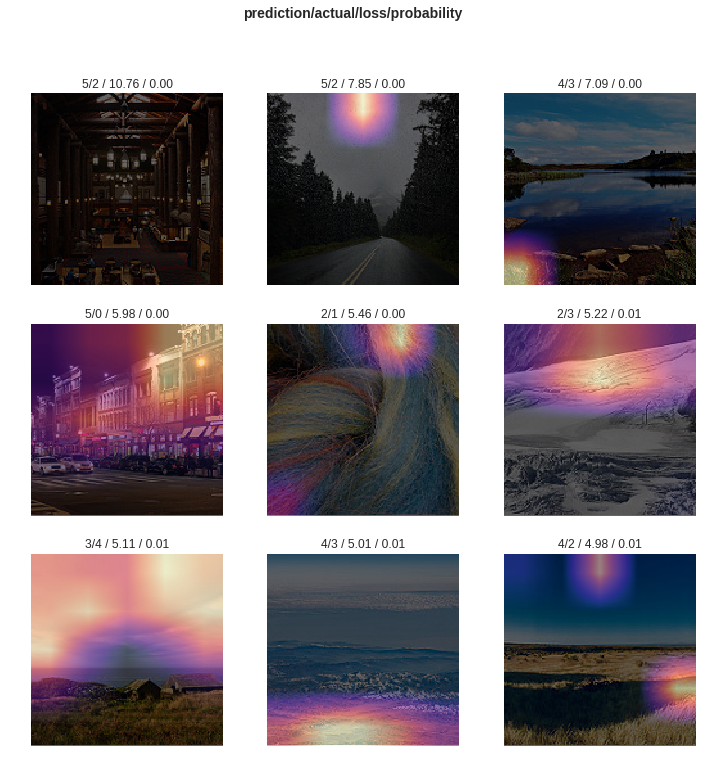

In [0]:
interp.plot_top_losses(9)

In [0]:
interp.y_true

tensor([3, 0, 0,  ..., 5, 4, 3])

In [0]:
help(ImageDataBunch.from_df)

Help on method from_df in module fastai.vision.data:

from_df(path:Union[pathlib.Path, str], df:pandas.core.frame.DataFrame, folder:Union[pathlib.Path, str]='.', label_delim:str=None, valid_pct:float=0.2, fn_col:Union[int, Collection[int], str, Collection[str]]=0, label_col:Union[int, Collection[int], str, Collection[str]]=1, suffix:str='', **kwargs:Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from a `DataFrame` `df`.



In [0]:
learn.predict(is_test=True)

TypeError: ignored

In [0]:
import pandas
test_df = pandas.read_csv('test.csv')
test_df['Class'] = 0
test_data = ImageDataBunch.from_df(path_img, valid_pct=0, df=test_df, ds_tfms=get_transforms(), size=150,  bs=bs).normalize(imagenet_stats)
assert (len(test_df) == len(test_data.train_ds)), 'Dimention Mismatch between ImageDataBunch size: {} and test dataframe size: {}, check validation split'.format(len(test_df), len(test_data.train_ds))

In [0]:
len(test_data.train_ds)

7301

In [0]:
learn.predict(test_data.train_ds.x)

AttributeError: ignored